In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


Weights=[0.25476444 0.01869482 0.24529929]
Epochs=133


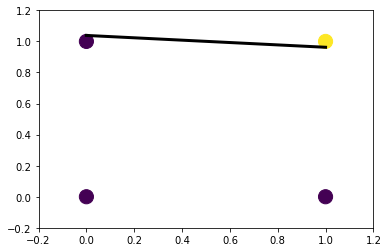

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_train(data, targets, learn_rate):
    """Trains perceptron model with specified learn rate.
    Input data's first column must be bias sign, and target must be a row vector.
    The function will train until the weights converge under a specified threshold."""
    
    num_inputs = np.shape(data)[1] #Get number of samples and inputs
    weights=2*np.random.rand(num_inputs)-1 #Initialize random weights between [-1,1]
    weight_diff=1 #Initialize weight difference as 100%
    epochs=0 #Number of current epochs
    
    #Runs while the cumulative weight difference is greater than 0.0001%
    while (weight_diff>0.000001): #Run through each epoch using vectors
        net=data.dot(weights)
        #Step activation
        output = list(map(lambda sample:1 if sample>0 else 0, net))
        old_weights = np.copy(weights) #Save shallow copy for weight diff calculations
        
        #Update weights using old weights
        weights=weights+learn_rate*np.transpose(data).dot(targets-output)
        
        #Update the weight difference (sum of all % weight differences)
        weight_diff=np.sum(np.abs(weights-old_weights)/np.abs(old_weights))
        epochs+=1 #Increment number of epochs
        
    print(f"Weights={weights}")
    print(f"Epochs={epochs}")
    
    #Scatter graph for test driver case ONLY
    x_points = np.array([np.min(data[:,1]), np.max(data[:,1])])
    y_points = (weights[0]-weights[1]*x_points)/weights[2]
    plt.scatter(data[:,1], data[:,2], c=targets, s=200, cmap='viridis')
    plt.plot(x_points, y_points, color='k', linewidth=3)
    plt.ylim(-0.2, 1.2)
    plt.xlim(-0.2, 1.2) 
    plt.show()

#Test driver code for AND gate
data=np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
targets=np.array([0,0,0,1])
learn_rate=0.01
perceptron_train(data, targets, learn_rate)

Weights=[1.7955984  1.0436052  1.02000187]
Epochs=2938


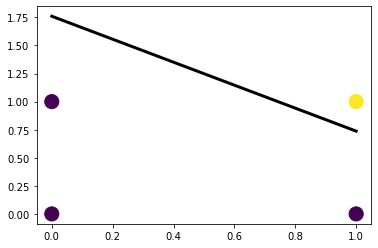

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def adaline_train(data, targets, learn_rate):
    """Trains adaline model with specified learn rate.
    Input data's first column must be bias sign, and target must be a row vector.
    The function will train until the weights converge under a specified threshold."""
    
    num_inputs = np.shape(data)[1] #Get number of samples and inputs
    weights=2*np.random.rand(num_inputs)-1 #Initialize random weights between [-1,1]
    weight_diff=1 #Initialize weight difference as 100%
    epochs=0 #Number of current epochs
    
    #Runs while the cumulative weight difference is greater than 0.1%
    while (weight_diff>0.001): #Run through each epoch using vectors
        net=data.dot(weights)
        sigmoid=1/(1+np.exp(-net)) #Sigmoid activation
        old_weights = np.copy(weights) #Save shallow copy for weight diff calculations
        
        #Update weights using old weights using special Adaline weight update equation
        weights=weights+learn_rate*np.transpose(data).dot((targets-sigmoid)*(sigmoid**2*np.exp(-net)))
        
        #Update the weight difference (sum of all % weight differences)
        weight_diff=np.sum(np.abs(weights-old_weights)/np.abs(old_weights))
        epochs+=1 #Increment number of epochs
        
    print(f"Weights={weights}")
    print(f"Epochs={epochs}")
    
    #Scatter graph for test driver case ONLY
    x_points = np.array([np.min(data[:,1]), np.max(data[:,1])])
    y_points = (weights[0]-weights[1]*x_points)/weights[2]
    plt.scatter(data[:,1], data[:,2], c=targets, s=200, cmap='viridis')
    plt.plot(x_points, y_points, color='k', linewidth=3)
    plt.show()

#Test driver code for AND gate
data=np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
targets=np.array([0,0,0,1])
learn_rate=0.01
adaline_train(data, targets, learn_rate)

Weights=[ 1.4342506   0.5832242  -1.52008917  0.30527784]
Epochs=4


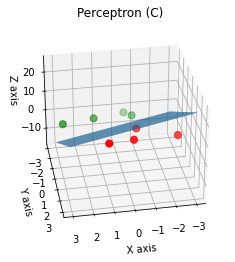

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_train(data, targets, learn_rate):
    """Trains perceptron model with specified learn rate.
    Input data's first column must be bias sign, and target must be a row vector.
    The function will train until the weights converge under a specified threshold."""
    
    num_inputs = np.shape(data)[1] #Get number of samples and inputs
    weights=2*np.random.rand(num_inputs)-1 #Initialize random weights between [-1,1]
    weight_diff=1 #Initialize weight difference as 100%
    epochs=0 #Number of current epochs
    
    #Runs while the cumulative weight difference is greater than 0.0001%
    while (weight_diff>0.000001): #Run through each epoch using vectors
        net=data.dot(weights)
        #Step Activation
        output = list(map(lambda sample:1 if sample>0 else 0, net))
        old_weights = np.copy(weights) #Save shallow copy for weight diff calculations
        
        #Update weights using old weights
        weights=weights+learn_rate*np.transpose(data).dot(targets-output)
        
        #Update the weight difference (sum of all % weight differences)
        weight_diff=np.sum(np.abs(weights-old_weights)/np.abs(old_weights))
        epochs+=1 #Increment number of epochs
 
    print(f"Weights={weights}")
    print(f"Epochs={epochs}")
    
    #3D Scatter graph for driver code
    ax = plt.axes(projection='3d')
    x_points = np.linspace(-3, 3, 30)
    y_points = np.linspace(-3, 3, 30)
    x_mesh, y_mesh = np.meshgrid(x_points, y_points)
    z_mesh = (weights[0]-weights[1]*x_mesh-weights[2]*y_mesh)/weights[3]
    colormap = np.array(['r', 'g'])
    ax.scatter(data[:,1], data[:,2], data[:,3], c=colormap[targets], s=50, cmap='viridis')
    ax.plot_surface(x_mesh, y_mesh, z_mesh, edgecolor='none')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Perceptron (C)')
    ax.view_init(30, 80)
    
#Driver code question C
data=np.array([[-1, 0.8, 0.7, 1.2],[-1, -0.8,-0.7, 0.2],[-1, -0.5,0.3,-0.2],[-1, -2.8, -0.1, -2],[-1, 1.2,-1.7, 2.2],[-1, -0.8,-2, 0.5],[-1, -0.5,-2.7,-1.2],[-1, 2.8, -1.4, 2.1]])
targets=np.array([0,0,0,0,1,1,1,1])
learn_rate=0.6
perceptron_train(data, targets, learn_rate)

Weights=[ 4.09903264  2.55416433 -4.59110565  0.25149975]
Epochs=1025


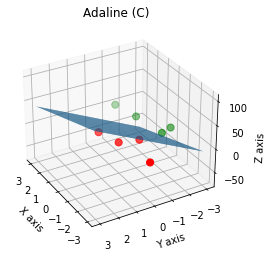

In [222]:
import numpy as np
import matplotlib.pyplot as plt

def adaline_train(data, targets, learn_rate):
    """Trains adaline model with specified learn rate.
    Input data's first column must be bias sign, and target must be a row vector.
    The function will train until the weights converge under a specified threshold."""
    
    num_inputs = np.shape(data)[1] #Get number of samples and inputs
    weights=2*np.random.rand(num_inputs)-1 #Initialize random weights between [-1,1]
    weight_diff=1 #Initialize weight difference as 100%
    epochs=0 #Number of current epochs
    
    #Runs while the cumulative weight difference is greater than 0.1%
    while (weight_diff>0.001): #Run through each epoch using vectors
        net=data.dot(weights)
        sigmoid=1/(1+np.exp(-net)) #Sigmoid activation
        old_weights = np.copy(weights) #Save shallow copy for weight diff calculations
        
        #Update weights using old weights using special Adaline weight update equation
        weights=weights+learn_rate*np.transpose(data).dot((targets-sigmoid)*(sigmoid**2*np.exp(-net)))
        
        #Update the weight difference (sum of all % weight differences)
        weight_diff=np.sum(np.abs(weights-old_weights)/np.abs(old_weights))
        epochs+=1 #Increment number of epochs
        
    print(f"Weights={weights}")
    print(f"Epochs={epochs}")
    
    #3D Scatter graph for driver code
    ax = plt.axes(projection='3d')
    x_points = np.linspace(-3, 3, 30)
    y_points = np.linspace(-3, 3, 30)
    x_mesh, y_mesh = np.meshgrid(x_points, y_points)
    z_mesh = (weights[0]-weights[1]*x_mesh-weights[2]*y_mesh)/weights[3]
    colormap = np.array(['r', 'g'])
    ax.scatter(data[:,1], data[:,2], data[:,3], c=colormap[targets], s=50, cmap='viridis')
    ax.plot_surface(x_mesh, y_mesh, z_mesh, edgecolor='none')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Adaline (C)')
    ax.view_init(30, 150)

#Driver code question C
data=np.array([[-1, 0.8, 0.7, 1.2],[-1, -0.8,-0.7, 0.2],[-1, -0.5,0.3,-0.2],[-1, -2.8, -0.1, -2],[-1, 1.2,-1.7, 2.2],[-1, -0.8,-2, 0.5],[-1, -0.5,-2.7,-1.2],[-1, 2.8, -1.4, 2.1]])
targets=np.array([0,0,0,0,1,1,1,1])
learn_rate=0.6
adaline_train(data, targets, learn_rate)

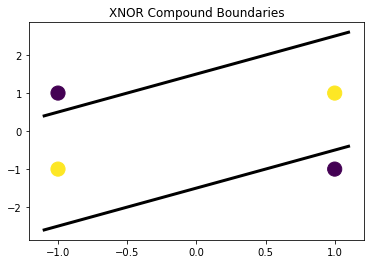

In [227]:
data=np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
targets=np.array([1,-1,-1,1])
w1=np.array([1.5,-1,1])
w2=np.array([-1.5,-1,1])

x_points = np.array([-1.1,1.1])
y1_points = -w1[1]/w1[2]*x_points-w1[0]/w1[2]
y2_points = -w2[1]/w2[2]*x_points-w2[0]/w2[2]

plt.scatter(data[:,0], data[:,1], c=targets, s=200)
plt.plot(x_points, y1_points, color='k', linewidth=3)
plt.plot(x_points, y2_points, color='k', linewidth=3)
plt.title('XNOR Compound Boundaries')
plt.show()